In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [11]:
Lkvec

,time,frequency,media,phrase,root,id
0,2008-08-18 18:31:45,3,B,kind of creepy,it's kind of creepy to think that that many pe...,1785689
1,2008-10-19 07:47:48,1,M,kind of creepy,it's kind of creepy to think that that many pe...,1785689
2,2008-10-19 07:50:23,1,M,kind of creepy,it's kind of creepy to think that that many pe...,1785689
3,2008-10-24 10:21:43,1,M,kind of creepy,it's kind of creepy to think that that many pe...,1785689
4,2008-11-22 11:19:21,1,M,kind of creepy,it's kind of creepy to think that that many pe...,1785689
...,...,...,...,...,...,...
7665103,2008-12-12 17:17:22,2,B,and then click on the,option and then click on the,1686328
7665104,2008-12-12 17:17:23,1,B,and then click on the,option and then click on the,1686328
7665105,2008-11-02 21:35:41,2,B,option and then click on the,option and then click on the,1686328
7665106,2008-12-12 17:17:22,2,B,option and then click on the,option and then click on the,1686328


C:\Users\Asus\AppData\Local\Temp\ipykernel_9808\1996303891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['time'] = pd.to_datetime(cluster['time'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_9808\1996303891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['time'] =cluster['time'].dt.date


(array([14092., 14123., 14153., 14184., 14214., 14245., 14276.]),
 [Text(14092.0, 0, '2008-08'),
  Text(14123.0, 0, '2008-09'),
  Text(14153.0, 0, '2008-10'),
  Text(14184.0, 0, '2008-11'),
  Text(14214.0, 0, '2008-12'),
  Text(14245.0, 0, '2009-01'),
  Text(14276.0, 0, '2009-02')])

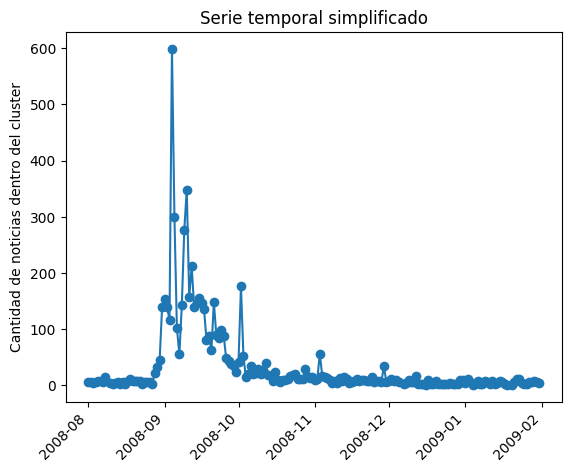

In [34]:
cluster = Lkvec[Lkvec['id'] == 790378]
cluster['time'] = pd.to_datetime(cluster['time'])
cluster['time'] =cluster['time'].dt.date
conteo_fechas = cluster['time'].value_counts().reset_index()
#simplificacion en ignorar la frecuencias
conteo_ordenado = conteo_fechas.sort_values('time')
plt.figure()
plt.title('Serie temporal simplificado')
plt.plot(conteo_ordenado['time'], conteo_ordenado['count'], 'o-')
plt.ylabel('Cantidad de noticias dentro del cluster')
plt.xticks(rotation=45, ha='right')


(array([14092., 14123., 14153., 14184., 14214., 14245., 14276.]),
 [Text(14092.0, 0, '2008-08'),
  Text(14123.0, 0, '2008-09'),
  Text(14153.0, 0, '2008-10'),
  Text(14184.0, 0, '2008-11'),
  Text(14214.0, 0, '2008-12'),
  Text(14245.0, 0, '2009-01'),
  Text(14276.0, 0, '2009-02')])

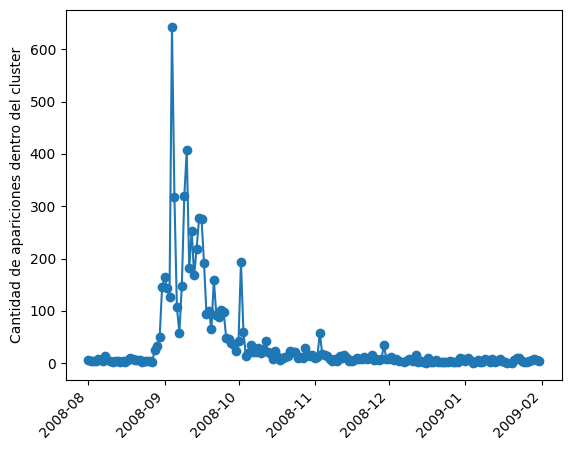

In [36]:
#plt.plot(cluster['time'], cluster['frequency'], '.')
frecuencia_total_por_dia = cluster.groupby(cluster['time'])['frequency'].sum()
fechas = frecuencia_total_por_dia.index
frecuencias = frecuencia_total_por_dia.values
plt.plot(fechas, frecuencias, 'o-')
plt.ylabel('Cantidad de apariciones dentro del cluster')
plt.xticks(rotation=45, ha='right')
